In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,iqr
from statsmodels import robust

In [3]:
df = pd.read_csv('IMU_Mega.csv')

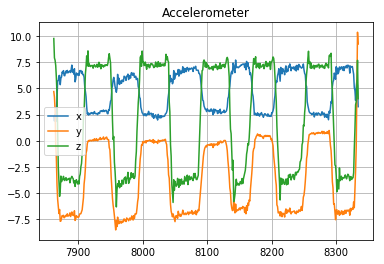

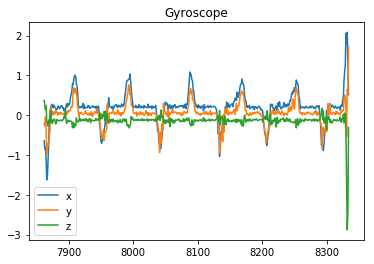

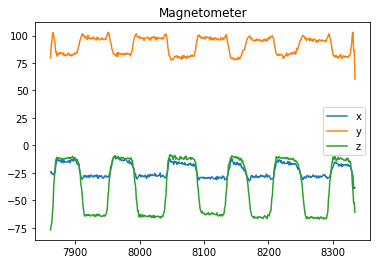

In [257]:
fromRow = 7862
toRow = 8335
#accelerometer
x = df.iloc[fromRow:toRow,1]
y = df.iloc[fromRow:toRow,2]
z = df.iloc[fromRow:toRow,3]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.grid()

plt.legend()
plt.title("Accelerometer")
plt.show()
#gyroscope
x = df.iloc[fromRow:toRow,4]
y = df.iloc[fromRow:toRow,5]
z = df.iloc[fromRow:toRow,6]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.legend()
plt.title("Gyroscope")
plt.show()
#Magnetometer
x = df.iloc[fromRow:toRow,7]
y = df.iloc[fromRow:toRow,8]
z = df.iloc[fromRow:toRow,9]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.legend()
plt.title("Magnetometer")
plt.show()


In [258]:
#180
print(np.amax(df.iloc[6655:6670,1]))
print(np.amin(df.iloc[6655:6670,1]))
#90 degree
print(np.amax(df.iloc[6680:6695,1]))
print(np.amin(df.iloc[6680:6695,1]))
# move
print(np.amax(df.iloc[6671:6676,1]))
print(np.amin(df.iloc[6671:6676,1]))

7.202126
6.498195
-0.766184
-1.431806
6.464674
2.178835


In [259]:
nintyDegree = []
zeroDegree = []
movement = []
for i in range(fromRow,toRow):
    if df.iloc[i][2]<=-7 and df.iloc[i][2]>=-8:
        nintyDegree.append(i)
    elif df.iloc[i][2]<=1 and df.iloc[i][2]>=-1:
        zeroDegree.append(i)
    elif df.iloc[i][2]<-1 and df.iloc[i][2]>-7:
        movement.append(i)

In [260]:
print(nintyDegree)
print(zeroDegree)
print(movement)

[7872, 7873, 7874, 7875, 7876, 7877, 7878, 7879, 7880, 7881, 7882, 7884, 7885, 7886, 7888, 7891, 7892, 7893, 7895, 7896, 7897, 7898, 7899, 7900, 7901, 7902, 7956, 7957, 7959, 7961, 7962, 7963, 7964, 7965, 7966, 7967, 7968, 7969, 7970, 7971, 7972, 7973, 7974, 7975, 7976, 7977, 7978, 7979, 7980, 7981, 7982, 7983, 7984, 7985, 7986, 7987, 7989, 8046, 8048, 8049, 8050, 8051, 8052, 8053, 8054, 8056, 8057, 8058, 8059, 8060, 8061, 8064, 8067, 8071, 8077, 8078, 8083, 8213, 8215, 8216, 8219, 8220, 8299, 8302, 8305, 8307, 8310, 8312, 8321]
[7865, 7913, 7914, 7915, 7916, 7917, 7918, 7919, 7920, 7921, 7922, 7923, 7924, 7925, 7926, 7927, 7928, 7929, 7930, 7931, 7932, 7933, 7934, 7935, 7936, 7937, 7938, 7939, 7940, 7941, 7942, 7943, 7944, 7945, 7946, 7947, 7948, 7949, 7998, 7999, 8000, 8001, 8002, 8003, 8004, 8005, 8006, 8007, 8008, 8009, 8010, 8011, 8012, 8013, 8014, 8015, 8016, 8017, 8018, 8019, 8020, 8021, 8022, 8023, 8024, 8025, 8026, 8027, 8028, 8029, 8030, 8031, 8032, 8033, 8034, 8035, 8036, 80

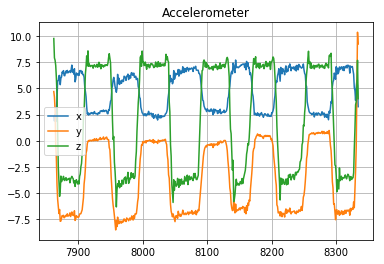

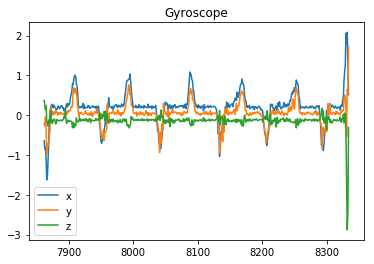

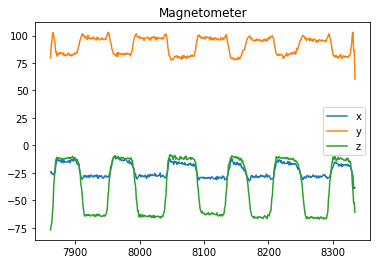

In [261]:
FromRow = 6900
ToRow = 6950
#accelerometer
x = df.iloc[fromRow:toRow,1]
y = df.iloc[fromRow:toRow,2]
z = df.iloc[fromRow:toRow,3]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.grid()

plt.legend()
plt.title("Accelerometer")
plt.show()
#gyroscope
x = df.iloc[fromRow:toRow,4]
y = df.iloc[fromRow:toRow,5]
z = df.iloc[fromRow:toRow,6]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.legend()
plt.title("Gyroscope")
plt.show()
#Magnetometer
x = df.iloc[fromRow:toRow,7]
y = df.iloc[fromRow:toRow,8]
z = df.iloc[fromRow:toRow,9]
plt.plot(x,label='x')
plt.plot(y,label='y')
plt.plot(z,label='z')
plt.legend()
plt.title("Magnetometer")
plt.show()


## Ninty Degree window

In [262]:
x=len(nintyDegree)
for i in range(0,x-1):
    print(nintyDegree[i+1]-nintyDegree[i])

1
1
1
1
1
1
1
1
1
1
2
1
1
2
3
1
1
2
1
1
1
1
1
1
1
54
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
57
2
1
1
1
1
1
1
2
1
1
1
1
1
3
3
4
6
1
5
130
2
1
3
1
79
3
3
2
3
2
9


In [263]:
x=len(nintyDegree)
indexNinty = [0]
for i in range(0,x-1):
    if(nintyDegree[i+1]-nintyDegree[i])>15:
        indexNinty.append(i)
        indexNinty.append(i+1)
#indexNinty.append(x-1)
indexNinty

[0, 25, 26, 56, 57, 76, 77, 81, 82]

In [264]:
matrixNinty = df.iloc[nintyDegree[indexNinty[2]]:nintyDegree[indexNinty[3]],1:10]
matrixNinty

,-7.968309,5.621872,-2.016021,-0.054388,-0.04426,0.123338,10.102137,52.31464,-74.004241
7956,5.693702,-7.187760,-2.063907,-0.269352,-0.449642,-0.139597,-19.843482,92.362396,-18.151985
7957,5.176528,-7.882113,-2.897132,-0.156166,-0.422743,0.105418,-17.498344,88.213302,-16.232063
7958,4.937096,-8.523793,-4.079927,-0.221415,-0.414487,-0.111367,-15.153206,86.589744,-12.915836
7959,4.635411,-7.642681,-6.325803,-0.123941,-0.330597,0.045495,-12.086486,84.244606,-11.694067
7960,5.018503,-8.198164,-4.716818,0.223606,0.289130,-0.051445,-10.282533,82.801445,-10.995914
7961,6.344958,-7.302687,-4.108659,0.173272,-0.042704,-0.177148,-10.282533,82.801445,-10.995914
7962,5.459058,-7.934789,-4.357669,0.439326,-0.210220,-0.150782,-9.741347,82.621047,-9.425069
7963,5.976232,-7.666625,-3.816552,0.246776,0.027071,-0.175817,-12.266881,82.621047,-10.123223
7964,5.382440,-7.906057,-4.491751,0.210823,0.052904,-0.099383,-11.184510,81.177886,-10.472299
7965,5.698491,-7.685779,-4.333726,0.213753,0.051307,-0.162767,-10.823719,84.064208,-11.519529


## Zero degree Window

In [265]:
x=len(zeroDegree)
for i in range(0,x-1):
    print(zeroDegree[i+1]-zeroDegree[i])

48
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
49
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
59
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
41
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
54
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
39


In [269]:
y=len(zeroDegree)
indexZero = []
for i in range(0,y-1):
    if(zeroDegree[i+1]-zeroDegree[i])>10:
        indexZero.append(i)
        indexZero.append(i+1)

indexZero.pop(0)
indexZero

[1, 37, 38, 77, 78, 113, 114, 144, 145, 181, 182]

In [270]:
matrixZero = df.iloc[zeroDegree[indexZero[0]]:zeroDegree[indexZero[1]],1:10]
matrixZero

,-7.968309,5.621872,-2.016021,-0.054388,-0.04426,0.123338,10.102137,52.31464,-74.004241
7913,3.251492,-0.933786,8.111969,0.715766,0.388734,-0.158506,-28.863248,100.660583,-57.946720
7914,2.542772,-0.263376,7.159028,0.555441,0.224148,-0.172887,-27.600481,99.758605,-62.659255
7915,2.686431,-0.062252,8.590834,0.254233,0.048377,-0.156109,-28.682853,97.954650,-64.404640
7916,2.456576,0.023943,7.120718,0.186055,-0.034981,-0.123884,-27.420085,98.856628,-63.531948
7917,2.571504,-0.043098,7.340996,0.187919,0.072080,-0.061033,-27.600481,99.037025,-64.055564
7918,2.609813,0.057464,7.154239,0.214019,0.063025,-0.150250,-29.224039,97.774253,-62.833793
7919,2.557138,0.009577,7.091987,0.190583,0.040121,-0.110035,-28.502458,96.331092,-63.881023
7920,2.691220,0.033521,7.159028,0.204165,0.071014,-0.119889,-27.780876,100.299789,-63.881023
7921,2.657699,-0.019155,7.202126,0.226003,0.025740,-0.108970,-27.420085,97.413467,-62.833793
7922,2.672065,0.081407,7.187760,0.297910,0.014554,-0.141461,-29.404434,97.593856,-63.706485


## movement window

In [271]:
x=len(movement)
for i in range(0,x-1):
    print(movement[i+1]-movement[i])

1
1
1
1
1
12
4
2
1
4
9
1
1
1
1
1
1
1
1
1
38
1
1
1
1
1
33
2
1
1
1
1
1
1
1
41
1
1
1
1
1
1
1
2
8
7
1
2
1
2
1
1
2
1
1
1
1
3
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
37
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
32
1
1
1
1
1
1
1
1
1
2
3
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
38
1
1
1
1
1
2
1
2
1
2
2
1
2
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1


In [272]:
z = len(movement)
indexMov = [0]
for i in range(0,z-1):
    if(movement[i+1]-movement[i])>12:
        indexMov.append(i)
        indexMov.append(i+1)

indexMov
#len(indexMov)


[0, 20, 21, 26, 27, 35, 36, 73, 74, 113, 114, 161, 162]

In [273]:
matrixMove = df.iloc[movement[indexMov[0]]:movement[indexMov[1]],1:10]
matrixMove

,-7.968309,5.621872,-2.016021,-0.054388,-0.04426,0.123338,10.102137,52.31464,-74.004241
7866,2.997693,-1.699970,6.000175,-1.624922,-0.959112,-0.141195,-25.796527,102.644927,-53.583263
7867,4.079927,-4.271473,4.367247,-1.554081,-0.700782,-0.206443,-26.878900,99.397811,-36.129432
7868,5.727222,-5.621872,0.967307,-1.131697,-0.769226,-0.277817,-24.894552,96.691886,-29.322437
7869,5.755954,-6.306649,-2.518829,-0.735679,-0.747121,-0.123085,-24.894552,92.723190,-21.293674
7870,6.225242,-6.957905,-3.830918,-0.135393,-0.499976,-0.115096,-18.400321,84.425003,-13.613989
7871,6.239607,-6.574813,-5.315399,0.005756,-0.402769,-0.180344,-15.694392,85.326980,-12.043144
7872,5.358497,-7.700145,-4.759915,0.185256,0.216159,0.129653,-12.266881,81.177886,-10.821376
7873,5.976232,-7.676202,-3.375996,0.248640,0.180738,-0.099649,-12.266881,81.899467,-11.868606
7874,6.095948,-7.398460,-3.907536,0.240917,-0.006485,-0.189399,-13.890439,83.883819,-12.043144
7875,6.565236,-7.149451,-3.706413,0.275805,0.078738,-0.206976,-14.251230,83.883819,-11.344991


## write Ninty degree

In [274]:

sub = 1

In [275]:
count = 1
NintydataList = []

for i in range(0,len(indexNinty)-1,2):
    matrixNinty = df.iloc[nintyDegree[indexNinty[i]]:nintyDegree[indexNinty[i+1]],1:10].to_numpy()
    mean = np.mean(matrixNinty,0)
    variance = np.var(matrixNinty,0)
    std = np.std(matrixNinty,0)
    median = np.median(matrixNinty,0)
    maximum = np.amax(matrixNinty,0)
    minimum = np.amin(matrixNinty,0)
    rms = np.sqrt(np.mean(matrixNinty**2,0))
    kt = kurtosis(matrixNinty)
    sk = skew(matrixNinty)
    IQR = iqr(matrixNinty,0)
    mad = robust.mad(matrixNinty)
    dataDict = {"meanAccX":mean[0],
               "meanAccY":mean[1],
               "meanAccZ":mean[2],
                "meanGyroY":mean[4],
               "meanGyroZ":mean[5],
               "meanMagX":mean[6],
               "meanMagY":mean[7],
               "meanMagZ":mean[8],
               "VarianceAccX":variance[0],
               "VarianceAccY":variance[1],
               "VarianceAccZ":variance[2],
               "VarianceGyroX":variance[3],
               "VarianceGyroY":variance[4],
               "VarianceGyroZ":variance[5],
               "VarianceMagX":variance[6],
               "VarianceMagY":variance[7],
               "VarianceMagZ":variance[8],
                "StdAccX":std[0],
               "StdAccY":std[1],
               "StdAccZ":std[2],
               "StdGyroX":std[3],
               "StdGyroY":std[4],
               "StdGyroZ":std[5],
               "StdMagX":std[6],
               "StdMagY":std[7],
               "StdMagZ":std[8],
                "MedianAccX":median[0],
               "MedianAccY":median[1],
               "MedianAccZ":median[2],
               "MedianGyroX":median[3],
               "MedianGyroY":median[4],
               "MedianGyroZ":median[5],
               "MedianMagX":median[6],
               "MedianMagY":median[7],
               "MedianMagZ":median[8],
                
                "MaxAccX":maximum[0],
               "MaxAccY":maximum[1],
               "MaxAccZ":maximum[2],
               "MaxGyroX":maximum[3],
               "MaxGyroY":maximum[4],
               "MaxGyroZ":maximum[5],
               "MaxMagX":maximum[6],
               "MaxMagY":maximum[7],
               "MaxMagZ":maximum[8],
                
                "MinAccX":minimum[0],
               "MinAccY":minimum[1],
               "MinAccZ":minimum[2],
               "MinGyroX":minimum[3],
               "MinGyroY":minimum[4],
               "MinGyroZ":minimum[5],
               "MinMagX":minimum[6],
               "MinMagY":minimum[7],
               "MinMagZ":minimum[8],
                
                "RMSAccX":rms[0],
               "RMSAccY":rms[1],
               "RMSAccZ":rms[2],
               "RMSGyroX":rms[3],
               "RMSGyroY":rms[4],
               "RMSGyroZ":rms[5],
               "RMSMagX":rms[6],
               "RMSMagY":rms[7],
               "RMSMagZ":rms[8],
                
                "KurtosisAccX":kt[0],
               "KurtosisAccY":kt[1],
               "KurtosisAccZ":kt[2],
               "KurtosisGyroX":kt[3],
               "KurtosisGyroY":kt[4],
               "KurtosisGyroZ":kt[5],
               "KurtosisMagX":kt[6],
               "KurtosisMagY":kt[7],
               "KurtosisMagZ":kt[8],
                
                "SkewAccX":sk[0],
               "SkewAccY":sk[1],
               "SkewAccZ":sk[2],
               "SkewGyroX":sk[3],
               "SkewGyroY":sk[4],
               "SkewGyroZ":sk[5],
               "SkewMagX":sk[6],
               "SkewMagY":sk[7],
               "SkewMagZ":sk[8],
                
                "IQRAccX":IQR[0],
               "IQRAccY":IQR[1],
               "IQRAccZ":IQR[2],
               "IQRGyroX":IQR[3],
               "IQRGyroY":IQR[4],
               "IQRGyroZ":IQR[5],
               "IQRMagX":IQR[6],
               "IQRMagY":IQR[7],
               "IQRMagZ":IQR[8],
                
                "MADAccX":mad[0],
               "MADAccY":mad[1],
               "MADAccZ":mad[2],
               "MADGyroX":mad[3],
               "MADGyroY":mad[4],
               "MADGyroZ":mad[5],
               "MADMagX":mad[6],
               "MADMagY":mad[7],
               "MADMagZ":mad[8], 
                "Label":6
               }
    NintydataList.append(dataDict)
    
data = pd.DataFrame(NintydataList)
data.to_csv("NewDataSet/label_6_180_sub_2.csv",index=False)

## write zero degree data

In [276]:
count = 1
zerodataList = []
for i in range(1,len(indexZero)-1,2):
    matrixMove = df.iloc[zeroDegree[indexZero[i]]:zeroDegree[indexZero[i+1]],1:10].to_numpy()
    mean = np.mean(matrixZero,0)
    variance = np.var(matrixZero,0)
    std = np.std(matrixZero,0)
    median = np.median(matrixZero,0)
    maximum = np.amax(matrixZero,0)
    minimum = np.amin(matrixZero,0)
    rms = np.sqrt(np.mean(matrixZero**2,0))
    kt = kurtosis(matrixZero)
    sk = skew(matrixZero)
    IQR = iqr(matrixZero,0)
    mad = robust.mad(matrixZero)
    dataDict = {"meanAccX":mean[0],
               "meanAccY":mean[1],
               "meanAccZ":mean[2],
                "meanGyroY":mean[4],
               "meanGyroZ":mean[5],
               "meanMagX":mean[6],
               "meanMagY":mean[7],
               "meanMagZ":mean[8],
               "VarianceAccX":variance[0],
               "VarianceAccY":variance[1],
               "VarianceAccZ":variance[2],
               "VarianceGyroX":variance[3],
               "VarianceGyroY":variance[4],
               "VarianceGyroZ":variance[5],
               "VarianceMagX":variance[6],
               "VarianceMagY":variance[7],
               "VarianceMagZ":variance[8],
                "StdAccX":std[0],
               "StdAccY":std[1],
               "StdAccZ":std[2],
               "StdGyroX":std[3],
               "StdGyroY":std[4],
               "StdGyroZ":std[5],
               "StdMagX":std[6],
               "StdMagY":std[7],
               "StdMagZ":std[8],
                "MedianAccX":median[0],
               "MedianAccY":median[1],
               "MedianAccZ":median[2],
               "MedianGyroX":median[3],
               "MedianGyroY":median[4],
               "MedianGyroZ":median[5],
               "MedianMagX":median[6],
               "MedianMagY":median[7],
               "MedianMagZ":median[8],
                
                "MaxAccX":maximum[0],
               "MaxAccY":maximum[1],
               "MaxAccZ":maximum[2],
               "MaxGyroX":maximum[3],
               "MaxGyroY":maximum[4],
               "MaxGyroZ":maximum[5],
               "MaxMagX":maximum[6],
               "MaxMagY":maximum[7],
               "MaxMagZ":maximum[8],
                
                "MinAccX":minimum[0],
               "MinAccY":minimum[1],
               "MinAccZ":minimum[2],
               "MinGyroX":minimum[3],
               "MinGyroY":minimum[4],
               "MinGyroZ":minimum[5],
               "MinMagX":minimum[6],
               "MinMagY":minimum[7],
               "MinMagZ":minimum[8],
                
                "RMSAccX":rms[0],
               "RMSAccY":rms[1],
               "RMSAccZ":rms[2],
               "RMSGyroX":rms[3],
               "RMSGyroY":rms[4],
               "RMSGyroZ":rms[5],
               "RMSMagX":rms[6],
               "RMSMagY":rms[7],
               "RMSMagZ":rms[8],
                
                "KurtosisAccX":kt[0],
               "KurtosisAccY":kt[1],
               "KurtosisAccZ":kt[2],
               "KurtosisGyroX":kt[3],
               "KurtosisGyroY":kt[4],
               "KurtosisGyroZ":kt[5],
               "KurtosisMagX":kt[6],
               "KurtosisMagY":kt[7],
               "KurtosisMagZ":kt[8],
                
                "SkewAccX":sk[0],
               "SkewAccY":sk[1],
               "SkewAccZ":sk[2],
               "SkewGyroX":sk[3],
               "SkewGyroY":sk[4],
               "SkewGyroZ":sk[5],
               "SkewMagX":sk[6],
               "SkewMagY":sk[7],
               "SkewMagZ":sk[8],
                
                "IQRAccX":IQR[0],
               "IQRAccY":IQR[1],
               "IQRAccZ":IQR[2],
               "IQRGyroX":IQR[3],
               "IQRGyroY":IQR[4],
               "IQRGyroZ":IQR[5],
               "IQRMagX":IQR[6],
               "IQRMagY":IQR[7],
               "IQRMagZ":IQR[8],
                
                "MADAccX":mad[0],
               "MADAccY":mad[1],
               "MADAccZ":mad[2],
               "MADGyroX":mad[3],
               "MADGyroY":mad[4],
               "MADGyroZ":mad[5],
               "MADMagX":mad[6],
               "MADMagY":mad[7],
               "MADMagZ":mad[8], 
                "Label":5
               }
    zerodataList.append(dataDict)
    
data = pd.DataFrame(zerodataList)
data.to_csv("NewDataSet/label_5_ninty_sub_2.csv",index=False)

## write movement data

In [277]:
count = 1
movdataList = []
for i in range(0,len(indexMov)-1,2):
    matrixMov = df.iloc[movement[indexMov[i]]:movement[indexMov[i+1]],1:10].to_numpy()
    mean = np.mean(matrixMov,0)
    variance = np.var(matrixMov,0)
    std = np.std(matrixMov,0)
    median = np.median(matrixMov,0)
    maximum = np.amax(matrixMov,0)
    minimum = np.amin(matrixMov,0)
    rms = np.sqrt(np.mean(matrixMov**2,0))
    kt = kurtosis(matrixMov)
    sk = skew(matrixMov)
    IQR = iqr(matrixMov,0)
    mad = robust.mad(matrixMov)
    dataDict = {"meanAccX":mean[0],
               "meanAccY":mean[1],
               "meanAccZ":mean[2],
                "meanGyroY":mean[4],
               "meanGyroZ":mean[5],
               "meanMagX":mean[6],
               "meanMagY":mean[7],
               "meanMagZ":mean[8],
               "VarianceAccX":variance[0],
               "VarianceAccY":variance[1],
               "VarianceAccZ":variance[2],
               "VarianceGyroX":variance[3],
               "VarianceGyroY":variance[4],
               "VarianceGyroZ":variance[5],
               "VarianceMagX":variance[6],
               "VarianceMagY":variance[7],
               "VarianceMagZ":variance[8],
                "StdAccX":std[0],
               "StdAccY":std[1],
               "StdAccZ":std[2],
               "StdGyroX":std[3],
               "StdGyroY":std[4],
               "StdGyroZ":std[5],
               "StdMagX":std[6],
               "StdMagY":std[7],
               "StdMagZ":std[8],
                "MedianAccX":median[0],
               "MedianAccY":median[1],
               "MedianAccZ":median[2],
               "MedianGyroX":median[3],
               "MedianGyroY":median[4],
               "MedianGyroZ":median[5],
               "MedianMagX":median[6],
               "MedianMagY":median[7],
               "MedianMagZ":median[8],
                
                "MaxAccX":maximum[0],
               "MaxAccY":maximum[1],
               "MaxAccZ":maximum[2],
               "MaxGyroX":maximum[3],
               "MaxGyroY":maximum[4],
               "MaxGyroZ":maximum[5],
               "MaxMagX":maximum[6],
               "MaxMagY":maximum[7],
               "MaxMagZ":maximum[8],
                
                "MinAccX":minimum[0],
               "MinAccY":minimum[1],
               "MinAccZ":minimum[2],
               "MinGyroX":minimum[3],
               "MinGyroY":minimum[4],
               "MinGyroZ":minimum[5],
               "MinMagX":minimum[6],
               "MinMagY":minimum[7],
               "MinMagZ":minimum[8],
                
                "RMSAccX":rms[0],
               "RMSAccY":rms[1],
               "RMSAccZ":rms[2],
               "RMSGyroX":rms[3],
               "RMSGyroY":rms[4],
               "RMSGyroZ":rms[5],
               "RMSMagX":rms[6],
               "RMSMagY":rms[7],
               "RMSMagZ":rms[8],
                
                "KurtosisAccX":kt[0],
               "KurtosisAccY":kt[1],
               "KurtosisAccZ":kt[2],
               "KurtosisGyroX":kt[3],
               "KurtosisGyroY":kt[4],
               "KurtosisGyroZ":kt[5],
               "KurtosisMagX":kt[6],
               "KurtosisMagY":kt[7],
               "KurtosisMagZ":kt[8],
                
                "SkewAccX":sk[0],
               "SkewAccY":sk[1],
               "SkewAccZ":sk[2],
               "SkewGyroX":sk[3],
               "SkewGyroY":sk[4],
               "SkewGyroZ":sk[5],
               "SkewMagX":sk[6],
               "SkewMagY":sk[7],
               "SkewMagZ":sk[8],
                
                "IQRAccX":IQR[0],
               "IQRAccY":IQR[1],
               "IQRAccZ":IQR[2],
               "IQRGyroX":IQR[3],
               "IQRGyroY":IQR[4],
               "IQRGyroZ":IQR[5],
               "IQRMagX":IQR[6],
               "IQRMagY":IQR[7],
               "IQRMagZ":IQR[8],
                
                "MADAccX":mad[0],
               "MADAccY":mad[1],
               "MADAccZ":mad[2],
               "MADGyroX":mad[3],
               "MADGyroY":mad[4],
               "MADGyroZ":mad[5],
               "MADMagX":mad[6],
               "MADMagY":mad[7],
               "MADMagZ":mad[8], 
                "Label":0
               }
    movdataList.append(dataDict)
    
data = pd.DataFrame(movdataList)
data.to_csv("NewDataSet/label_0_mov_sub_1.csv",index=False)